<!--BOOK_INFORMATION-->
This notebook contains both adapted and unmodified material from: 
[Introduction to Machine Learning with Python](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/)
by Sarah Guido, Andreas C. Müller; the content is available [on GitHub](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb).

# 09 Machine Learing Part 1  
# Review Exercises - Solutions

# Review Exercise : KNN Classifier with Real Data

You are now going to build a KNN classifier for the data in the `planets DataFrame` that we studied last week. 

The exercise will involve:
- manipulating the data using:
    - programing fundamentals
    - Pandas operation studied last week
- Building a KNN machine learning model to identify the __measurement method__ (`method`) used for a planet from feature data including it's orbital period and distance. 


1. Import the `planets` data from the `seaborn` package to a Pandas `DataFrame` as we did last week. 
1. Drop null (`NaN`) values:
    - show how many null values appear in each column
    - drop any *columns* where less than half the values are non-null
    - drop all remaining *rows* containing null values
1. Create a column with a __unique integer value__ to represent each unique string value in the `method` column of the `DataFrame`. <br>*Hint : If using the method demonstrated today, you must __reverse__ the order of the list created using the `.unique()` method. This is because the string `Transit` appears __twice__, once by itself and once as part of another string.*
1. Split the data set into training and test data
1. Create a scatter plot to check if the different `method` classes/targets can be separated using the features
1. Import the KNN model, instantiate and fit the model to the training data
1. What percentage of the test data does the model predict correctly? 
1. Look at step 5 again. <br>Do some features seperate the classes better than others? <br>What happens if you remove the features that do not seperate the classes well? <br>How does this effect the accuracy of the model prediction? <br>__Note__: Normally this process of identifying __feature importance__ would be automated. We will consider this in a later class. 




method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
0 Pulsar Timing
1 Orbital Brightness Modulation
2 Transit Timing Variations
3 Astrometry
4 Transit
5 Imaging
6 Eclipse Timing Variations
7 Radial Velocity
Test set score: 0.938


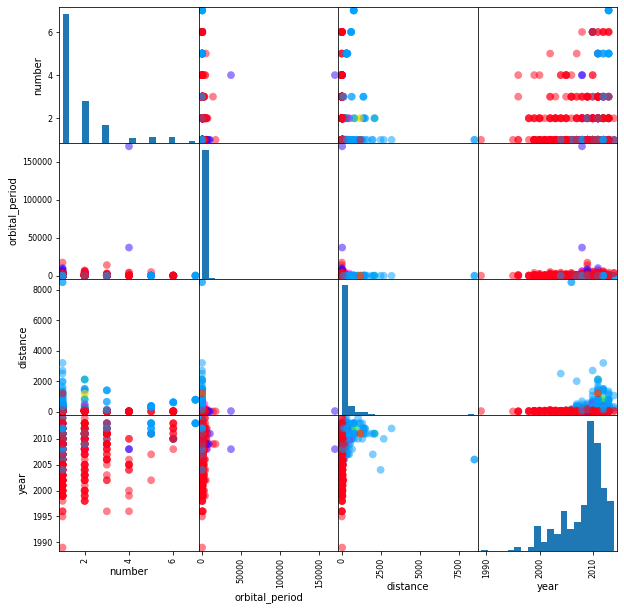

In [4]:
# Revew Exercise
# Example Solution
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

# 1. Import the planets data
import seaborn as sns
planets = sns.load_dataset('planets')
#print(planets.shape)

# 6. Import the KNN model 
from sklearn.neighbors import KNeighborsClassifier


# 2. Drop null (NaN) values:
print(planets.isnull().sum())                     # show how many null values appear in each column
planets=planets.dropna(axis='columns',            # drop any columns where less than half the values are non-null
                       thresh=planets.shape[0]/2)    
#planets=planets.drop(['mass'], axis=1)

planets = planets.dropna()                        # drop all remaining rows containing null values


# 3. Create a column with a unique integer value for each method
planets['method_int'] = planets['method']
methods = list(planets.method.unique())
methods.reverse()
for n, m in enumerate(methods):
    print(n,m)
    planets['method_int'] = planets['method_int'].str.replace(m, str(n), regex=True)

planets.method_int = planets.method_int.astype(int)

    
# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(planets.loc[:, 'number':'year'], # features
                                                    planets['method_int'],     # labels
                                                    random_state=0)

# 5. create a scatter matrix from the X_train dataframe, color by y_train
pd.plotting.scatter_matrix(X_train,                 # data frame
                           c=y_train,               # colour by y_train
                           figsize=(10, 10),
                           marker='o', 
                           hist_kwds={'bins': 20},  # plotting keyword arguments to be passed to hist function
                           s=60,                    # size of markers
                           alpha=.5,                # transparency of markers
                           cmap='hsv');             # colour map used for colour of each data plotted

# 6. Instantiate the model and fit the model to the training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 7. What percentage of the test data does the model predict correctly?
print(f"Test set score: {np.round(knn.score(X_test, y_test), 3)}")

In [ ]:
planets.head(10)